# Get DESI LegacySurvey data

In [1]:
from matplotlib import pyplot as plt
from oda_api.plot_tools import OdaImage
from oda_api.api import DispatcherAPI

In [2]:
%matplotlib notebook

In [3]:
disp=DispatcherAPI(url='https://www.astro.unige.ch/mmoda/dispatch-data', instrument='mock')

## Image and source catalog

In [4]:
par_dict={
    "DEC": -0.013294166666667,
    "RA": 40.66962125,
    "T1": "2017-03-06T13:26:48.000",
    "T2": "2017-03-06T15:32:27.000",
    "T_format": "isot",
    "data_release": 9,
    "image_band": "g",
    "image_size": 3.0,
    "instrument": "legacysurvey",
    "pixel_size": 1.0,
    "product": "legacy_survey_image",
    "product_type": "Real",
    "src_name": "NGC1068"
}

data_collection = disp.get_product(**par_dict)


please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`
/home/dsavchenko/Projects/cloud/dispatcher-container/oda_api/oda_api/api.py:1046: UserWarning: 
----------------------------------------------------------------------------
the parameter: T_format   is not among valid ones:
['src_name', 'RA', 'DEC', 'T1', 'T2', 'token', 'data_release', 'image_band', 'image_size', 'pixel_size']
this will throw an error in a future version 
and might break the current request!
 ----------------------------------------------------------------------------

  warnings.warn(msg)


In [5]:
data_collection.show()

ID=0 prod_name=mosaic_image_0_mosaic  meta_data: {'product': 'mosaic'}

ID=1 prod_name=dispatcher_catalog_1  meta_data: 



In [6]:
im = OdaImage(data_collection)

<IPython.core.display.Javascript object>


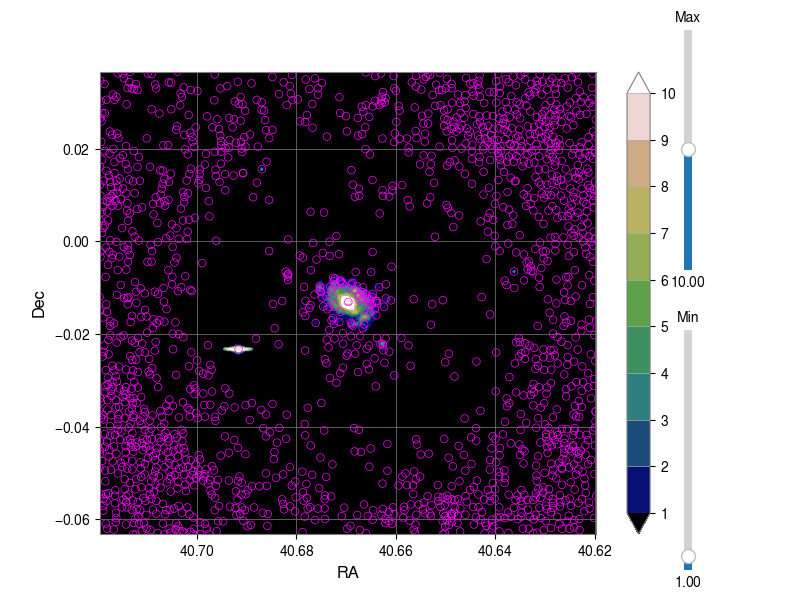

In [7]:
_ = im.show(unit_ID=0)

or without source positions

<IPython.core.display.Javascript object>


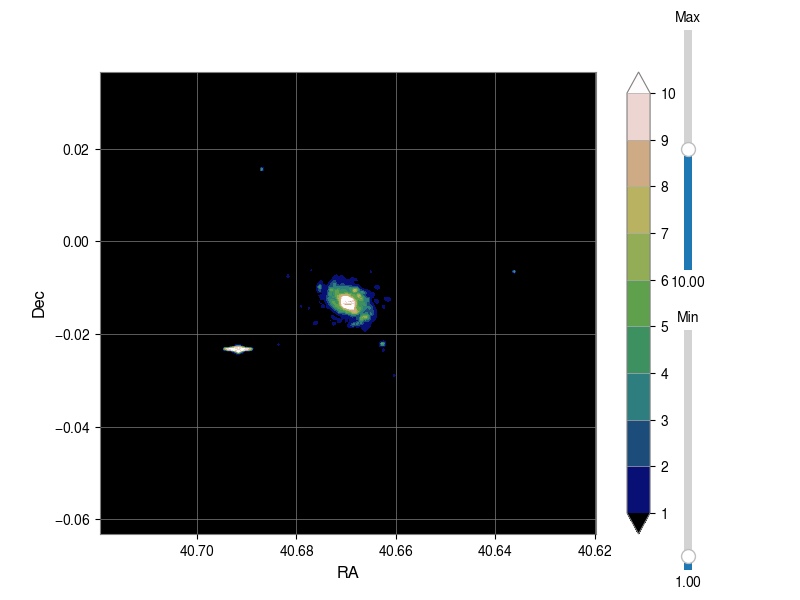

In [8]:
_ = im.show(unit_ID=0, sources=[])

access table of point sources with full information

In [9]:
data_collection.dispatcher_catalog_1.table

index,ls_id,dec,ra,elat,elon,glat,glon,mjd_max,mjd_min,ref_id,brickid,blob_nea_g,blob_nea_r,blob_nea_z,bx,by,dchisq_1,dchisq_2,dchisq_3,dchisq_4,dchisq_5,dec_ivar,dered_flux_g,dered_flux_r,dered_flux_w1,dered_flux_w2,dered_flux_w3,dered_flux_w4,dered_flux_z,dered_mag_g,dered_mag_r,dered_mag_w1,dered_mag_w2,dered_mag_w3,dered_mag_w4,dered_mag_z,ebv,fiberflux_g,fiberflux_r,fiberflux_z,fibertotflux_g,fibertotflux_r,fibertotflux_z,flux_g,flux_ivar_g,flux_ivar_r,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,flux_ivar_w4,flux_ivar_z,flux_r,flux_w1,flux_w2,flux_w3,flux_w4,flux_z,fracflux_g,fracflux_r,fracflux_w1,fracflux_w2,fracflux_w3,fracflux_w4,fracflux_z,fracin_g,fracin_r,fracin_z,fracmasked_g,fracmasked_r,fracmasked_z,gaia_a_g_val,gaia_astrometric_excess_noise,gaia_astrometric_excess_noise_sig,gaia_astrometric_sigma5d_max,gaia_astrometric_weight_al,gaia_e_bp_min_rp_val,gaia_phot_bp_mean_flux_over_error,gaia_phot_bp_mean_mag,gaia_phot_bp_rp_excess_factor,gaia_phot_g_mean_flux_over_error,gaia_phot_g_mean_mag,gaia_phot_rp_mean_flux_over_error,gaia_phot_rp_mean_mag,galdepth_g,galdepth_r,galdepth_z,g_r,htm9,mag_g,mag_r,mag_w1,mag_w2,mag_w3,mag_w4,mag_z,mw_transmission_g,mw_transmission_r,mw_transmission_w1,mw_transmission_w2,mw_transmission_w3,mw_transmission_w4,mw_transmission_z,nea_g,nea_r,nea_z,nest4096,objid,parallax_ivar,parallax,pmdec_ivar,pmdec,pmra_ivar,pmra,psfdepth_g,psfdepth_r,psfdepth_w1,psfdepth_w2,psfdepth_w3,psfdepth_w4,psfdepth_z,psfsize_g,psfsize_r,psfsize_z,ra_ivar,random_id,rchisq_g,rchisq_r,rchisq_w1,rchisq_w2,rchisq_w3,rchisq_w4,rchisq_z,ref_epoch,ring256,r_z,sersic_ivar,sersic,shape_e1_ivar,shape_e1,shape_e2_ivar,shape_e2,shape_r_ivar,shape_r,snr_g,snr_r,snr_w1,snr_w2,snr_w3,snr_w4,snr_z,w1_w2,w2_w3,w3_w4,wise_x,wise_y,z_w1,allmask_g,allmask_r,allmask_z,anymask_g,anymask_r,anymask_z,brick_primary,fitbits,gaia_astrometric_n_good_obs_al,gaia_astrometric_n_obs_al,gaia_astrometric_params_solved,gaia_duplicated_source,gaia_phot_bp_n_obs,gaia_phot_g_n_obs,gaia_phot_rp_n_obs,gaia_phot_variable_flag,maskbits,nobs_g,nobs_r,nobs_w1,nobs_w2,nobs_w3,nobs_w4,nobs_z,release,wisemask_w1,wisemask_w2,brickname,ref_cat,type,wise_coadd_id
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,object,object,object,object,float64,float64,object,object,float64,float64,float64,object,int64,object,object,object,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,float64,float64,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,str8,object,str3,object
0,9906621427880926,-0.0596966442535656,40.62011924313649,-15.065612076628272,38.18117059409122,-52.0014302658619,172.09502453470583,58383.33571984074,56609.15719128259,0,330530,467.8855285644531,477.57861328125,417.7110595703125,1866.5638427734375,979.240478515625,1646.1456298828125,2892.973876953125,2660.22607421875,2921.70654296875,3046.53955078125,1947283840.0,5.162485122680664,10.754593849182129,15.756853103637695,-4.9643201828

## Photometry data

In [10]:
par_dict={
    "DEC": -0.013294166666667,
    "RA": 40.66962125,
    "T1": "2017-03-06T13:26:48.000",
    "T2": "2017-03-06T15:32:27.000",
    "T_format": "isot",
    "data_release": 9,
    "instrument": "legacysurvey",
    "product": "legacy_survey_photometry",
    "product_type": "Real",
    "radius_photometry": 1.0,
    "src_name": "NGC1068"
}

data_collection = disp.get_product(**par_dict)

please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`
/home/dsavchenko/Projects/cloud/dispatcher-container/oda_api/oda_api/api.py:1046: UserWarning: 
----------------------------------------------------------------------------
the parameter: T_format   is not among valid ones:
['src_name', 'RA', 'DEC', 'T1', 'T2', 'token', 'data_release', 'radius_photometry']
this will throw an error in a future version 
and might break the current request!
 ----------------------------------------------------------------------------

  warnings.warn(msg)


In [11]:
data_collection.show()

ID=0 prod_name=legacy_survey_photometry_0  meta_data: OrderedDict()



In [12]:
ph_data = data_collection.legacy_survey_photometry_0
ph_data

E,nuFnu,nuFnu_err
eV,erg / (cm2 s),erg / (cm2 s)
float64,float64,float64
2.6010488659898483,3.577386033401825e-09,6.891867799656037e-14
1.9911736624573224,5.1539002648992134e-09,6.463046950134752e-14
1.3583318470299512,5.885992256374001e-09,8.391345448800664e-14
0.36837895162623446,5.252805568437323e-10,9.874500806718558e-14
0.268666156144902,1.7949798087414824e-10,1.512230428245725e-13
0.10268997757632492,2.723142536544446e-09,2.069919112844245e-13
0.0559025100962944,3.793626668689848e-09,4.909453055210824e-13


<IPython.core.display.Javascript object>


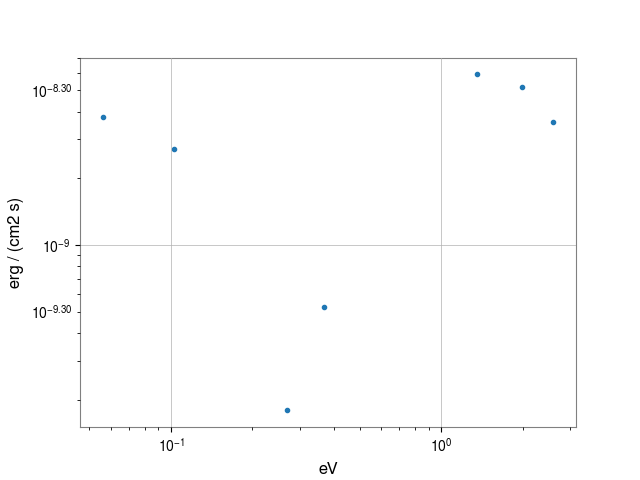

In [13]:
plt.figure()
plt.errorbar(ph_data['E'], ph_data['nuFnu'], ph_data['nuFnu_err'], fmt='.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(ph_data['E'].unit)
plt.ylabel(ph_data['nuFnu'].unit)
plt.show()